In [1]:
# importing the required libraries and modules
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
# specifying the location of the dataset
train_dir = 'Dataset/images/train'
test_dir = 'Dataset/images/test'

In [4]:
# creating a data frame with the function createdataframe
def createdataframe(dir):
    img_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            img_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return img_paths,labels

In [5]:
# train dataset or dataframe created
train = pd.DataFrame()
train['images'], train['label'] = createdataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                       images     label
0            Dataset/images/train\angry\0.jpg     angry
1            Dataset/images/train\angry\1.jpg     angry
2           Dataset/images/train\angry\10.jpg     angry
3        Dataset/images/train\angry\10002.jpg     angry
4        Dataset/images/train\angry\10016.jpg     angry
...                                       ...       ...
28816  Dataset/images/train\surprise\9969.jpg  surprise
28817  Dataset/images/train\surprise\9985.jpg  surprise
28818  Dataset/images/train\surprise\9990.jpg  surprise
28819  Dataset/images/train\surprise\9992.jpg  surprise
28820  Dataset/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
# test dataset or dataframe created
test = pd.DataFrame()
test['images'], test['label'] = createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                                     images     label
0       Dataset/images/test\angry\10052.jpg     angry
1       Dataset/images/test\angry\10065.jpg     angry
2       Dataset/images/test\angry\10079.jpg     angry
3       Dataset/images/test\angry\10095.jpg     angry
4       Dataset/images/test\angry\10121.jpg     angry
...                                     ...       ...
7061  Dataset/images/test\surprise\9806.jpg  surprise
7062  Dataset/images/test\surprise\9830.jpg  surprise
7063  Dataset/images/test\surprise\9853.jpg  surprise
7064  Dataset/images/test\surprise\9878.jpg  surprise
7065   Dataset/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
def extract_feature(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_feature(train['images'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\debas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_feature(test['images'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [20]:
model = Sequential()
input_shape = (48,48,1)
# convolutional layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
# fully connected layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','precision','recall'])

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [25]:
from keras.models import model_from_json

In [26]:
json_file = open("faceemotiondetector.json",'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("faceemotion.h5")

In [29]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [32]:
def ef(image):
    img = load_img(image,grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
image = 'Dataset/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  sad


original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  surprise


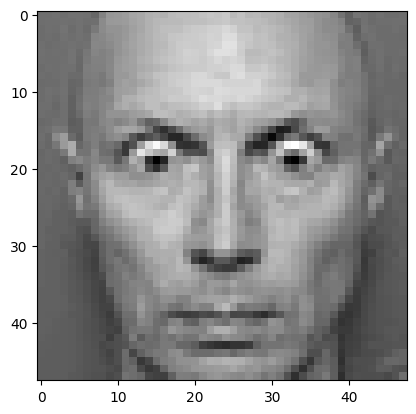

In [39]:
image = 'Dataset/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
model prediction is  happy


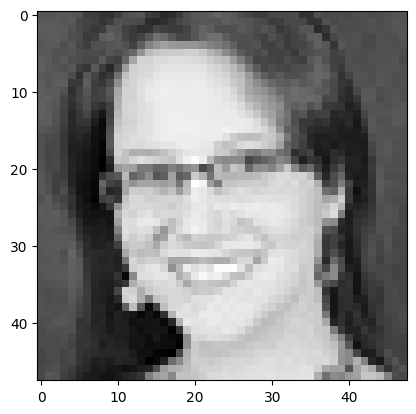

In [43]:
image = 'Dataset/images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')